In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Q1

In [158]:
CAPOP = pd.read_csv('q1.csv')

In [159]:
CAPOP.drop(axis = 0, index = 124, inplace = True)

In [160]:
#(a)
y = CAPOP['CAPOP']
x = np.arange(1, len(y) + 1)
X = np.column_stack([np.ones(len(x)), x])

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  CAPOP   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4401.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           1.41e-97
Time:                        15:09:10   Log-Likelihood:                -1126.9
No. Observations:                 124   AIC:                             2258.
Df Residuals:                     122   BIC:                             2263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4327.5370    389.897    -11.099      0.0

$\hat{\beta}_0 = -4327.5370, \hat{\beta}_1 = 359.1418$;

The $\hat{\beta}_0$ is the intercept of the fitted line, and the $\hat{\beta}_1$ is the slope of the fitted line, indicating 359.1418 increase in population for 1 unit increase of time step.

The result make sense because the population of california gradually increases across the given time window.

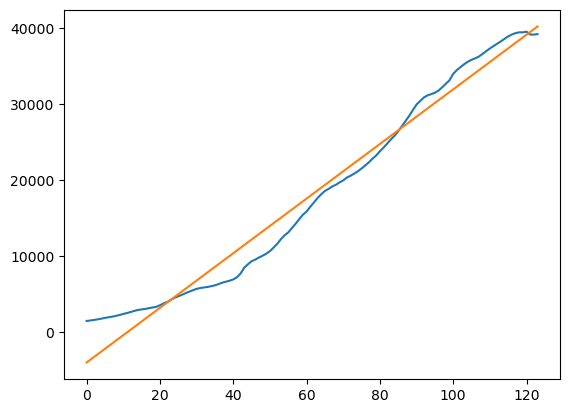

In [161]:
plt.plot(y, label = "Data")
plt.plot(results.fittedvalues, label = "Fitted values")

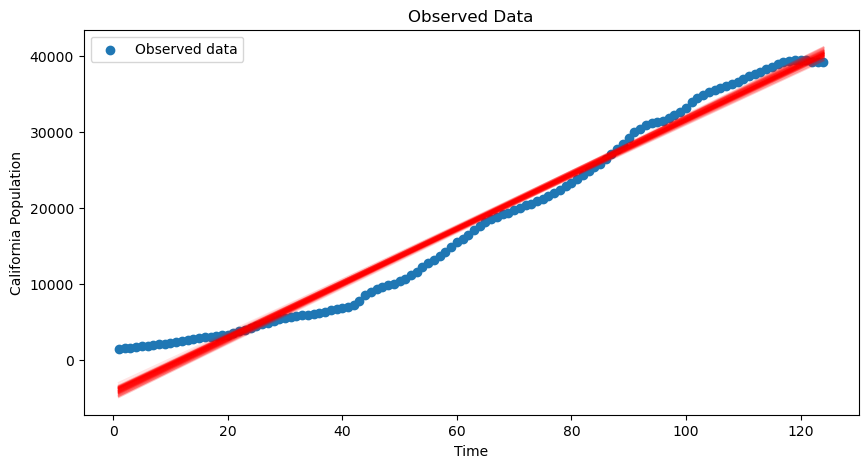

In [165]:
#(b)
plt.figure(figsize=(10, 5))

# Plot the observed dataset on the first subplot
plt.scatter(x, y, label='Observed data')
plt.xlabel('Time')
plt.ylabel('California Population')
plt.title('Observed Data')
plt.legend()


# Generate 100 samples from the posterior distribution using the multivariate t distribution
np.random.seed(0)
posterior_samples = np.random.multivariate_normal(results.params, results.cov_params(), 100)

# Plot lines corresponding to the samples from the posterior distribution on the second subplot
for sample in posterior_samples:
    plt.plot(x, sample[0] + sample[1] * x, color='red', alpha=0.1)

plt.show()


range of uncertainty is relatively small with all of the linear curves capturing the positive trend of the original data.

In [108]:
#(c)
# Predict the population for the year 2024
year_2024 = 2024 - 1900 + 1  # Convert year to time step
X_2024 = np.array([1, year_2024]).reshape(1, -1)

# Point estimate
point_estimate = results.predict(X_2024)[0]

# Uncertainty quantification
# Get the standard error of the prediction
prediction_std_err = np.sqrt(results.mse_resid * (1 + X_2024 @ np.linalg.inv(X.T @ X) @ X_2024.T))

# 95% confidence interval
conf_interval = (point_estimate - 1.96 * prediction_std_err, point_estimate + 1.96 * prediction_std_err)

print(f"Point estimate for 2024: {point_estimate}")
print(f"95% confidence interval for 2024: {conf_interval}")

Point estimate for 2024: 40565.190913453975
95% confidence interval for 2024: (array([[36267.53295321]]), array([[44862.84887369]]))


In [109]:
#(d)
log_y = np.log(y)

log_model = sm.OLS(log_y, X)
log_results = log_model.fit()

print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  CAPOP   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2408.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           3.50e-82
Time:                        14:20:59   Log-Likelihood:                 12.674
No. Observations:                 124   AIC:                            -21.35
Df Residuals:                     122   BIC:                            -15.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7216      0.040    194.024      0.0

$\hat{\beta}_0 = 7.7216, \hat{\beta}_1 = 0.0271$;

The formula $\log y_t = \beta_0 + \beta_1 t + \epsilon_t$ indicates that the logarithm of the population is modeled as a linear function of time. The estimated coefficients $\hat{\beta}_0 = 7.7216$ and $\hat{\beta}_1 = 0.0271$ suggest that the population grows exponentially over time. This makes sense given the historical trend of population growth in California.

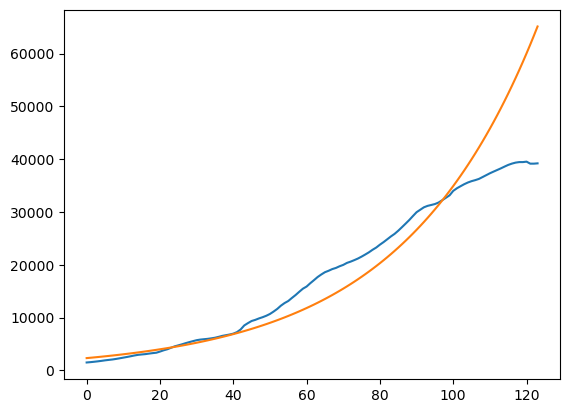

In [110]:
plt.plot(y, label = "Data")
plt.plot(np.exp(log_results.fittedvalues), label = "Fitted values")

In [111]:
#(e)
from scipy.stats import t

# Get the standard error of the parameters
standard_errors = log_results.bse
print(standard_errors)
# Degrees of freedom
df = log_results.df_resid

# Mean and standard error of beta1 hat
mean_beta1_hat = log_results.params['x1']
se_beta1_hat = standard_errors['x1']

# Calculate the probability
prob_beta1_gt_00_3 = 1 - t.cdf(0.03, df, loc=mean_beta1_hat, scale=se_beta1_hat)
print(f"Probability that beta1 > 0.03: {prob_beta1_gt_00_3}")

const    0.039797
x1       0.000553
dtype: float64
Probability that beta1 > 0.03: 3.724170429819651e-07


In [114]:
t.cdf(0.03, df, loc=mean_beta1_hat, scale=se_beta1_hat)

np.float64(0.999999627582957)

In [83]:
#(f)
# Predict the log population for the year 2024 using the log_model
log_point_estimate = log_results.predict(X_2024)[0]

# Convert the log point estimate back to the original scale
point_estimate_2024 = np.exp(log_point_estimate)

# Uncertainty quantification
# Get the standard error of the prediction
log_prediction_std_err = np.sqrt(log_results.mse_resid * (1 + X_2024 @ np.linalg.inv(X.T @ X) @ X_2024.T))

# 95% confidence interval on the log scale
log_conf_interval = (log_point_estimate - 1.96 * log_prediction_std_err, log_point_estimate + 1.96 * log_prediction_std_err)

# Convert the confidence interval back to the original scale
conf_interval_2024 = (np.exp(log_conf_interval[0]), np.exp(log_conf_interval[1]))

print(f"Point estimate for 2024: {point_estimate_2024}")
print(f"95% confidence interval for 2024: {conf_interval_2024}")

Point estimate for 2024: 66909.88560437526
95% confidence interval for 2024: (array([[43149.81612957]]), array([[103753.22986654]]))


In [67]:
#(g)
# Fit the model log yt = β0 + β1t + β2t^2 + εt
X_poly = np.column_stack([np.ones(len(x)), x, x**2])
log_poly_model = sm.OLS(log_y, X_poly)
log_poly_results = log_poly_model.fit()

print(log_poly_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  CAPOP   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.492e+04
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          7.82e-168
Time:                        16:13:40   Log-Likelihood:                 219.01
No. Observations:                 124   AIC:                            -432.0
Df Residuals:                     121   BIC:                            -423.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2302      0.011    630.463      0.0

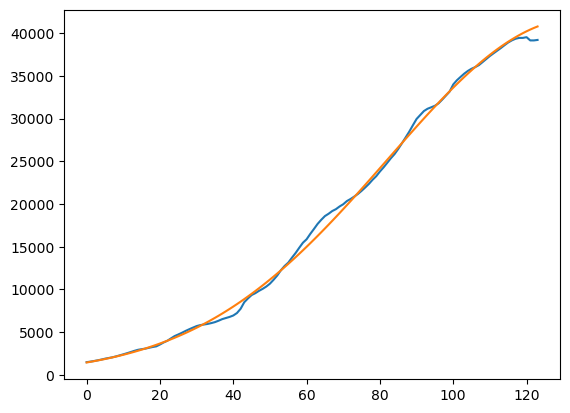

In [68]:
plt.plot(y, label = "Data")
plt.plot(np.exp(log_poly_results.fittedvalues), label = "Fitted values")

In [85]:
# Predict the log population for the year 2024 using the log_model
X_2024_poly = np.array([1, year_2024, year_2024**2]).reshape(1, -1)
log_point_estimate_2024 = log_poly_results.predict(X_2024_poly)[0]

# Convert the log point estimate back to the original scale
point_estimate_2024 = np.exp(log_point_estimate_2024)

# Uncertainty quantification
# Get the standard error of the prediction
log_prediction_std_err_2024 = np.sqrt(log_poly_results.mse_resid * (1 + X_2024_poly @ np.linalg.inv(X_poly.T @ X_poly) @ X_2024_poly.T))

# 95% confidence interval on the log scale
log_conf_interval_2024 = (log_point_estimate_2024 - 1.96 * log_prediction_std_err_2024, log_point_estimate_2024 + 1.96 * log_prediction_std_err_2024)

# Convert the confidence interval back to the original scale
conf_interval_2024 = (np.exp(log_conf_interval_2024[0]), np.exp(log_conf_interval_2024[1]))

print(f"Point estimate for 2024: {point_estimate_2024}")
print(f"95% confidence interval for 2024: {conf_interval_2024}")

Point estimate for 2024: 40933.47569172318
95% confidence interval for 2024: (array([[37593.6562601]]), array([[44570.00459365]]))


In [ ]:
#h
CAPOP_full = pd.read_csv('q1.csv')
real_2024 = CAPOP_full.iloc[124, 1]
linear_prediction_2024 = results.predict(X_2024)[0]
log_linear_prediction_2024 = log_results.predict(X_2024)[0]
log_poly_prediction_2024 = log_poly_results.predict(X_2024_poly)[0]

print(f"Real value for 2024: {real_2024}")
print(f"Linear prediction for 2024: {linear_prediction_2024}")
print(f"Log-linear prediction for 2024: {np.exp(log_linear_prediction_2024)}")
print(f"Log-polynomial prediction for 2024: {np.exp(log_poly_prediction_2024)}")

Real value for 2024: 39431.263
Linear prediction for 2024: 40565.190913453975
Log-linear prediction for 2024: 66909.88560437526
Log-polynomial prediction for 2024: 40933.47569172318


I would choose the $\log(y) = \beta_0 + \beta_1 t + \beta_2 t^{2} + \epsilon_{t}$ model because it best captures the specific trend of the population growing curve: that the slope of curve gradually increase and reaches its maximum around time step 60, and then the slope become gentler.

Linear model's prediction is the closest regarding the real value of 2024.

# Q2

In [115]:
beer = pd.read_csv('q2.csv')
beer.head()

,observation_date,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [116]:
y = beer['MRTSSM4453USN']
x = np.arange(1, len(y) + 1)
X = np.column_stack([np.ones(len(x)), x])

In [117]:
#(a)
log_y = np.log(y)

log_model = sm.OLS(log_y, X)
log_results = log_model.fit()

print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MRTSSM4453USN   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     3909.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          2.55e-206
Time:                        14:24:54   Log-Likelihood:                 271.38
No. Observations:                 395   AIC:                            -538.8
Df Residuals:                     393   BIC:                            -530.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3927      0.012    600.842      0.0

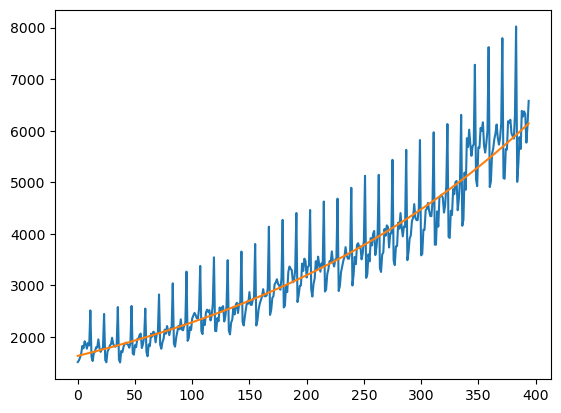

In [118]:
plt.plot(y, label = "Data")
plt.plot(np.exp(log_results.fittedvalues), label = "Fitted values")

The linear log model is not appropriate for this dataset because the fitted curve is monotonic and cannot capture the ossilating patterns of the real data.

                            OLS Regression Results                            
Dep. Variable:          MRTSSM4453USN   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1366.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          8.48e-207
Time:                        14:25:00   Log-Likelihood:                 280.85
No. Observations:                 395   AIC:                            -553.7
Df Residuals:                     391   BIC:                            -537.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4112      0.013    569.928      0.0

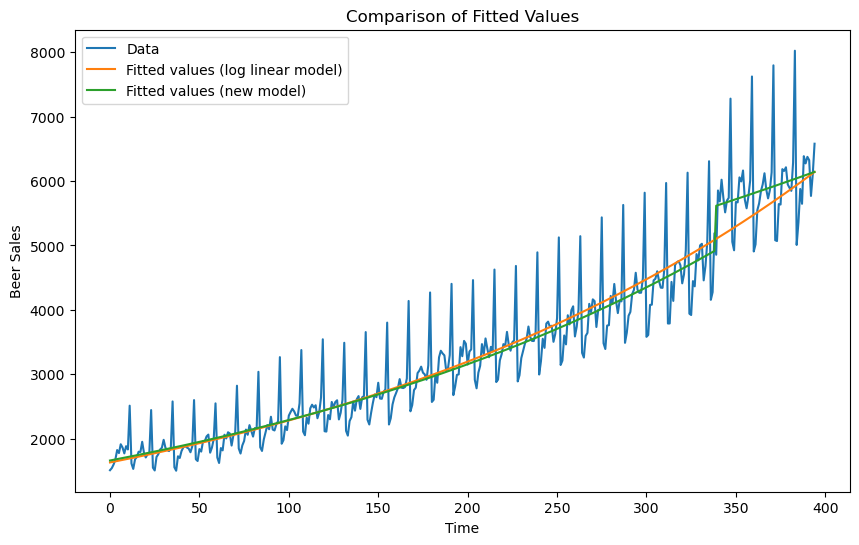

In [119]:
#(b)
# Define t0 as the time point corresponding to April 2020
t0 = np.where(beer['observation_date'] == '2020-04-01')[0][0] + 1

# Create the indicator variables
I_t_ge_t0 = (x >= t0).astype(int)
t_I_t_ge_t0 = x * I_t_ge_t0

# Create the design matrix for the new model
X_new = np.column_stack([np.ones(len(x)), x, I_t_ge_t0, t_I_t_ge_t0])

# Fit the new model
log_model_new = sm.OLS(log_y, X_new)
log_results_new = log_model_new.fit()

# Print the summary of the new model
print(log_results_new.summary())

# Plot the original data, fitted values of the log linear model, and fitted values of the new model
plt.figure(figsize=(10, 6))
plt.plot(y, label='Data')
plt.plot(np.exp(log_results.fittedvalues), label='Fitted values (log linear model)')
plt.plot(np.exp(log_results_new.fittedvalues), label='Fitted values (new model)')
plt.xlabel('Time')
plt.ylabel('Beer Sales')
plt.legend()
plt.title('Comparison of Fitted Values')
plt.show()

Yes, this model is equation (5) is slightly better than the model in (4) because it could capture the abrupt bump near time step 350 and reflect the central pattern of the orginal data after time step 350's abrupt increase, which the previous model fail to do so.

In [121]:
#(c) 
# Calculate the posterior probability that β3 < 0
mean_beta3_hat = log_results_new.params['x3']
se_beta3_hat = log_results_new.bse['x3']
df = log_results_new.df_resid

prob_beta3_lt_0 = t.cdf(0, df, loc=mean_beta3_hat, scale=se_beta3_hat)
print(f"Posterior probability that β3 < 0: {prob_beta3_lt_0}")

# Calculate the posterior probability that β2 + β3 * t0 > 0
mean_beta2_hat = log_results_new.params['x2']
se_beta2_hat = log_results_new.bse['x2']

mean_beta2_plus_beta3_t0 = mean_beta2_hat + mean_beta3_hat * t0
se_beta2_plus_beta3_t0 = np.sqrt(se_beta2_hat**2 + (t0 * se_beta3_hat)**2)

prob_beta2_plus_beta3_t0_gt_0 = 1 - t.cdf(0, df, loc=mean_beta2_plus_beta3_t0, scale=se_beta2_plus_beta3_t0)
print(f"Posterior probability that β2 + β3 * t0 > 0: {prob_beta2_plus_beta3_t0_gt_0}")

Posterior probability that β3 < 0: 0.9448882772438967
Posterior probability that β2 + β3 * t0 > 0: 0.6037369327258493


In [127]:
#(d)
# Define the Fourier terms
def fourier_terms(x, k):
    terms = []
    for i in range(1, k + 1):
        terms.append(np.cos(2 * np.pi * i * x / 12))
        terms.append(np.sin(2 * np.pi * i * x / 12))
    return np.column_stack(terms)


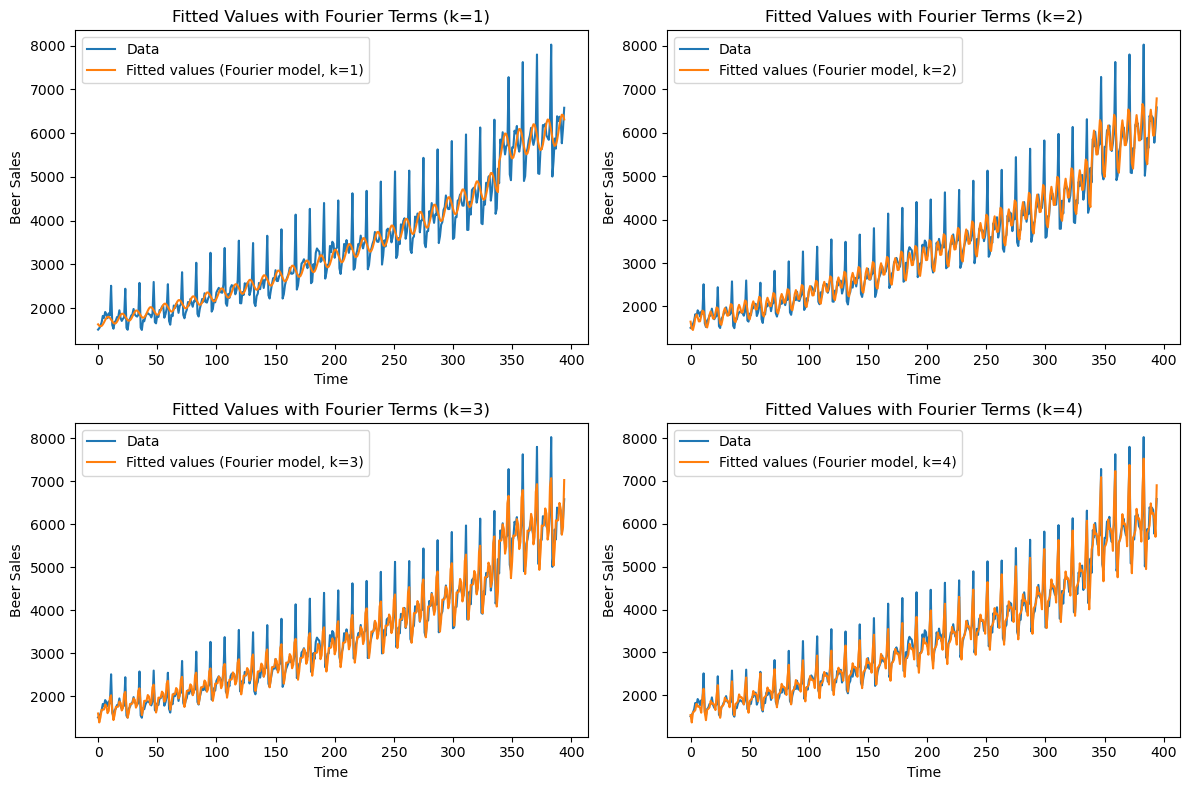

In [126]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Loop over different values of k
for i, k in enumerate([1, 2, 3, 4]):
    # Create the design matrix with Fourier terms
    fourier_X = fourier_terms(x, k)
    X_full = np.column_stack([X_new, fourier_X])

    # Fit the model
    model_full = sm.OLS(log_y, X_full)
    results_full = model_full.fit()

    # Determine subplot indices
    row = i // 2
    col = i % 2

    # Plot the original data and fitted values
    axs[row, col].plot(y, label='Data')
    axs[row, col].plot(np.exp(results_full.fittedvalues), label=f'Fitted values (Fourier model, k={k})')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Beer Sales')
    axs[row, col].legend()
    axs[row, col].set_title(f'Fitted Values with Fourier Terms (k={k})')

plt.tight_layout()
plt.show()

In [128]:
# Choose k
k = 4

# Create the design matrix with Fourier terms
fourier_X = fourier_terms(x, k)
X_full = np.column_stack([X_new, fourier_X])

# Fit the model
model_full = sm.OLS(log_y, X_full)
results_full = model_full.fit()

# Print the summary of the model
print(results_full.summary())

                            OLS Regression Results                            
Dep. Variable:          MRTSSM4453USN   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1402.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          1.37e-301
Time:                        14:33:09   Log-Likelihood:                 533.49
No. Observations:                 395   AIC:                            -1043.
Df Residuals:                     383   BIC:                            -995.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4139      0.007   1069.476      0.0

choose k = 4, because this could capture complex pattern such as the frequency of osillations, amplitudes from the original data well. Other models with smaller k on the other hand fail to capture some of the detailed traits from the original data such as the amplitude.

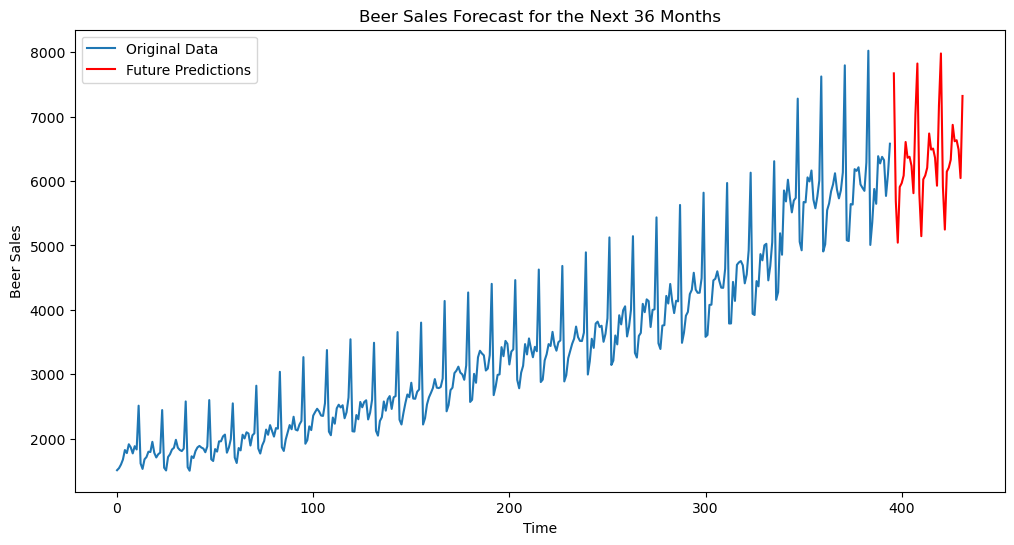

The forecast is reasonable because the model captures the seasonal patterns and trends in the historical data,
and the Fourier terms allow it to account for periodic fluctuations. The model also adjusts for the abrupt change
around April 2020, making it robust to such events.


In [ ]:
#(e)
# Generate future time steps
future_x = np.arange(len(x) + 1, len(x) + 37)
future_I_t_ge_t0 = (future_x >= t0).astype(int)
future_t_I_t_ge_t0 = future_x * future_I_t_ge_t0

# Create the design matrix for the future time steps with Fourier terms
future_fourier_X = fourier_terms(future_x, k)
future_X_full = np.column_stack([np.ones(len(future_x)), future_x, future_I_t_ge_t0, future_t_I_t_ge_t0, future_fourier_X])

# Predict the future sales data
future_log_predictions = results_full.predict(future_X_full)
future_predictions = np.exp(future_log_predictions)

# Plot the original data and future predictions
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Data')
plt.plot(np.arange(len(y) + 1, len(y) + 37), future_predictions, label='Future Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Beer Sales')
plt.legend()
plt.title('Beer Sales Forecast for the Next 36 Months')
plt.show()

The forecast is reasonable because the model captures the seasonal patterns and trends in the historical data,
and the Fourier terms allow it to account for periodic fluctuations. The model also adjusts for the abrupt change
around April 2020, making it robust to such events.

# Q3

In [137]:
yahoo = pd.read_csv('q3.csv')
yahoo.columns = yahoo.iloc[0]
yahoo = yahoo.drop(yahoo.index[0])
yahoo.rename(columns={'月份': 'month', 'yahoo: (美国)': 'heat'}, inplace=True)
yahoo.head()

月份,heat
2004-01,38
2004-02,37
2004-03,39
2004-04,38
2004-05,40


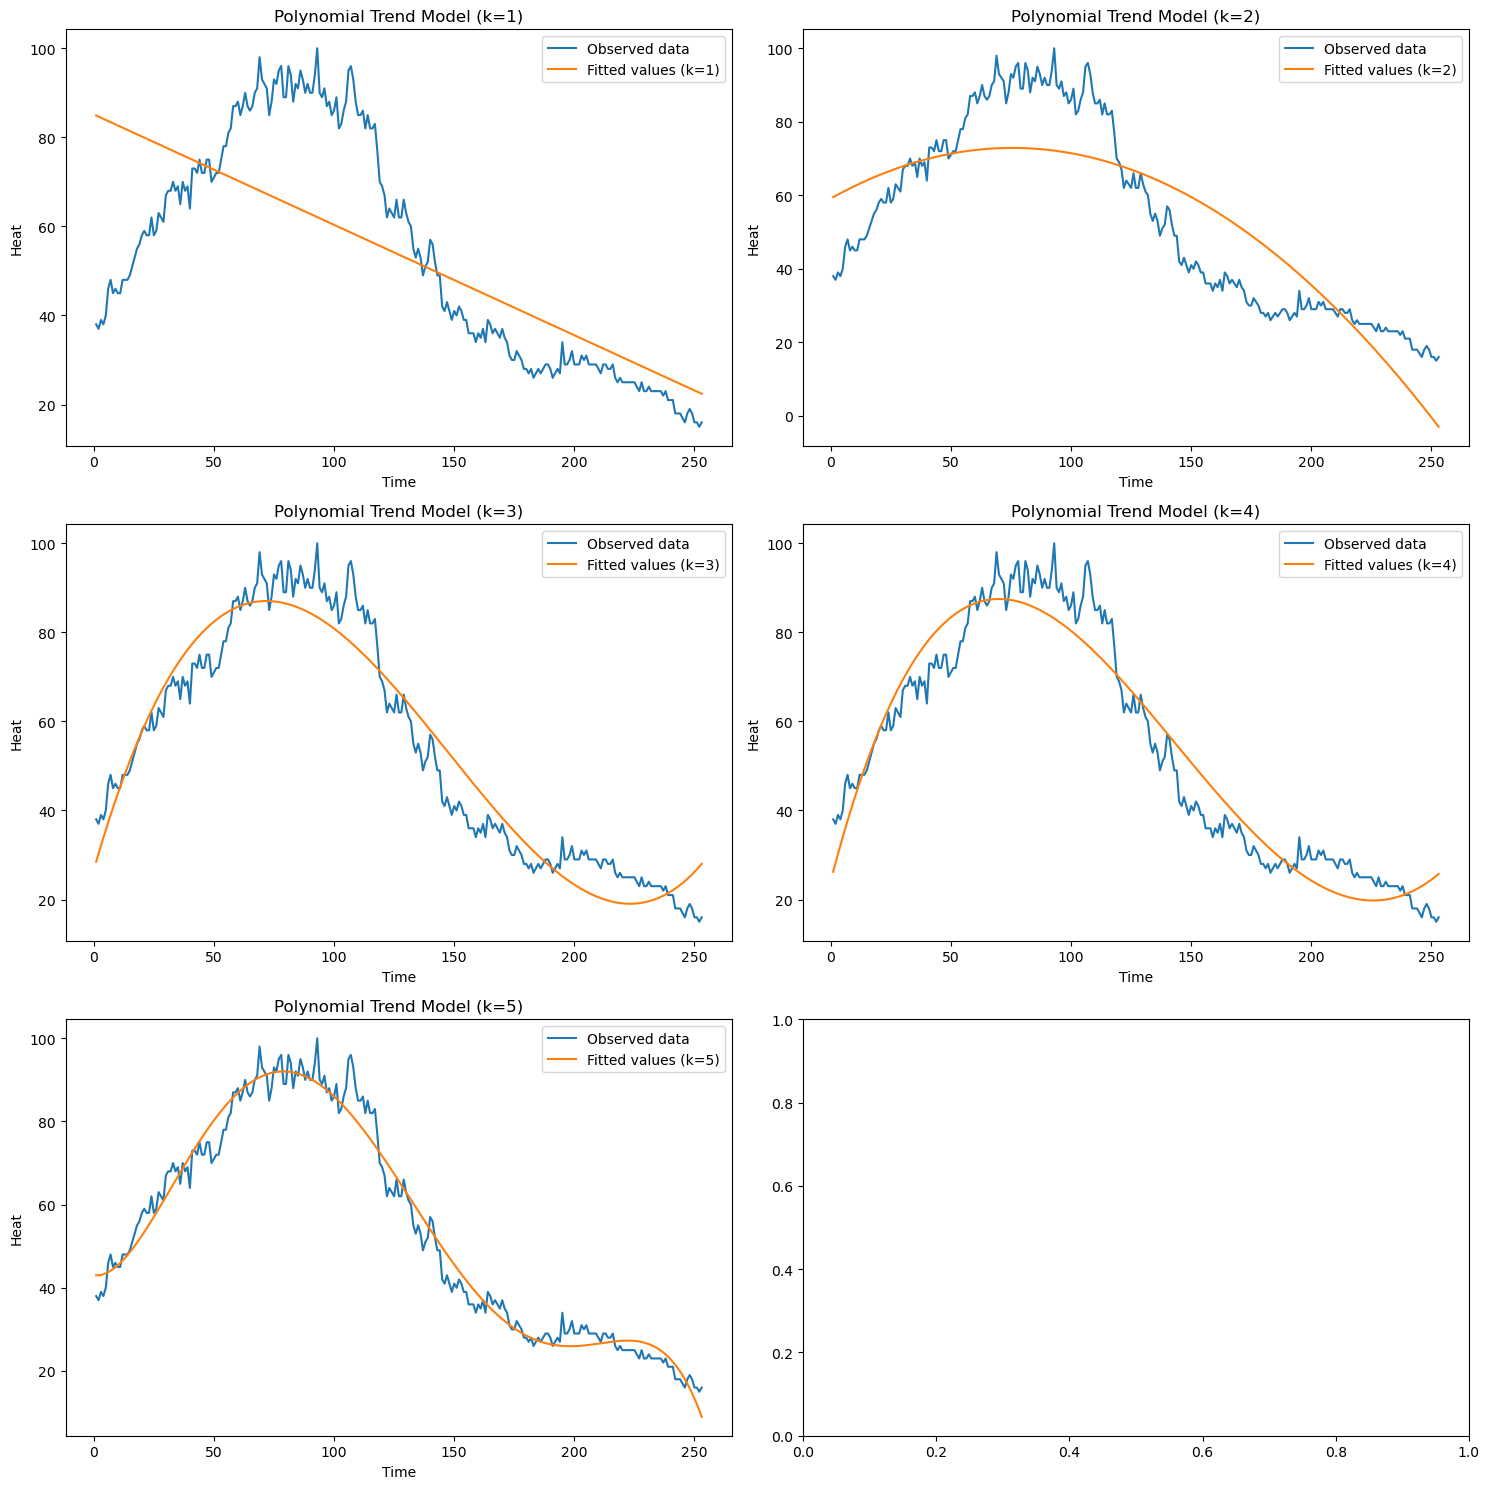

In [ ]:
#(a)
# Fit polynomial trend models for k = 1 to 5
x = np.arange(1, len(yahoo) + 1)
y = yahoo['heat']

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

for k in range(1, 6):
    X_poly = np.column_stack([np.ones(len(x))] + [x**i for i in range(k + 1)])
    model = sm.OLS(y.astype(float), X_poly)
    results = model.fit()
    
    # Plot the observed data and fitted values
    axs[k-1].plot(x, y.astype(float), label='Observed data')
    axs[k-1].plot(x, results.fittedvalues, label=f'Fitted values (k={k})')
    axs[k-1].set_xlabel('Time')
    axs[k-1].set_ylabel('Heat')
    axs[k-1].legend()
    axs[k-1].set_title(f'Polynomial Trend Model (k={k})')

plt.tight_layout()
plt.show()


pick the model with k = 5 because it captures the general pattern of the orginal data: that the heat trend goes up to its maxima around time step 80, and then drops down all the way towards a flat period after time step 180, then continue to drop down with steeper slope. For k = 1 and 2, these models are too simple, and for k = 3 and 4, the increasing patterns around the right-most (most recent) period are not accurate.

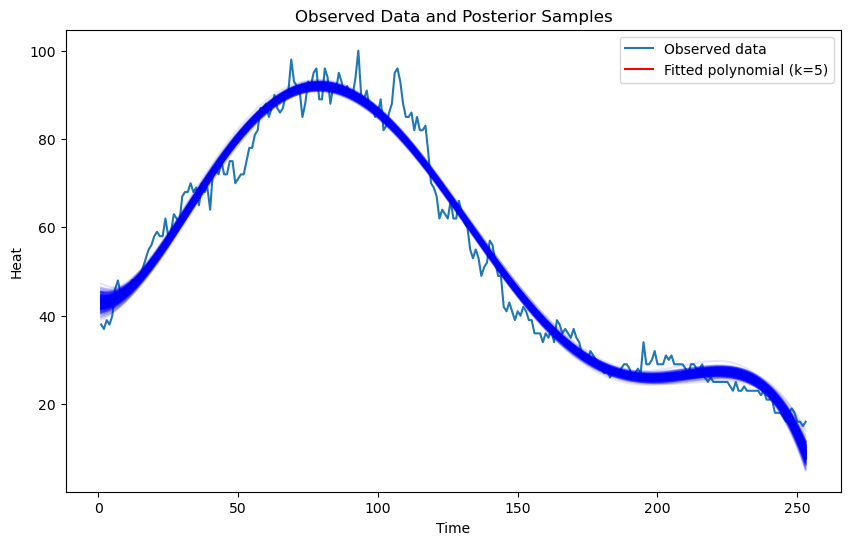

In [ ]:
#(b)
# Fit the polynomial trend model with k = 5
X_poly = np.column_stack([np.ones(len(x))] + [x**i for i in range(1, 6)])
model = sm.OLS(y.astype(float), X_poly)
results = model.fit()

# Plot the observed data and fitted polynomial
plt.figure(figsize=(10, 6))
plt.plot(x, y.astype(float), label='Observed data')
plt.plot(x, results.fittedvalues, label='Fitted polynomial (k=5)', color='red')

# Generate 300 samples from the posterior distribution of the coefficients
np.random.seed(0)
posterior_samples = np.random.multivariate_normal(results.params, results.cov_params(), 300)

# Plot polynomials corresponding to the samples from the posterior distribution
for sample in posterior_samples:
    plt.plot(x, np.dot(X_poly, sample), color='blue', alpha=0.1)

plt.xlabel('Time')
plt.ylabel('Heat')
plt.legend()
plt.title('Observed Data and Posterior Samples')
plt.show()

the range of uncertainty is relatively small with the majority of the fitter curve capturing the same non-monotonic patterns from the original data.

# Q4

## (a)

We aim to prove that:

$$
\beta \mid \text{data}, \sigma \sim N_{m+1} \left( \hat{\beta}, \sigma^{2}(X^{T}X)^{-1} \right),
$$

where $\hat{\beta} = (X^{T}X)^{-1}X^{T}Y$.

The prior distribution for $\beta$ and $\sigma$ is given by:

$$
f_{\beta, \sigma}(\beta, \sigma) = f_{\beta}(\beta) f_{\sigma}(\sigma) \propto \frac{\mathbf{1}(-c < \beta, \sigma < c)}{\sigma},
$$

where $\mathbf{1}(\cdot)$ is the indicator function. The posterior distribution of $\beta$ and $\sigma$ given the data is proportional to:

$$
f_{\beta, \sigma \mid \text{data}}(\beta, \sigma) \propto \sigma^{-n-1} \exp\left(-\frac{(y - X\beta)^{T}(y - X\beta)}{2\sigma^{2}}\right).
$$

When conditioned on both $y$ and $\sigma$, $\sigma$ can be treated as a constant. Thus, the conditional density of $\beta$ given $\sigma$ and $y$ is:

$$
f_{\beta \mid \sigma, \text{data}}(\beta) \propto \exp\left(-\frac{(y - X\beta)^{T}(y - X\beta)}{2\sigma^{2}}\right).
$$

Using the Pythagorean identity, we decompose the quadratic form:

$$
(y - X\beta)^{T}(y - X\beta) = (y - X\hat{\beta})^{T}(y - X\hat{\beta}) + (\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta}), \tag{1}
$$

where $\hat{\beta} = (X^{T}X)^{-1}X^{T}Y$ is the least squares estimator of \(\beta\). Since the term $(y - X\hat{\beta})^{T}(y - X\hat{\beta})$ does not depend on $\beta$, the conditional density simplifies to:

$$
f_{\beta \mid \sigma, y}(\beta) \propto \exp\left(-\frac{(\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})}{2\sigma^{2}}\right),
$$

which is the kernel of a $(m+1)$-variate normal distribution with mean $\hat{\beta}$ and variance-covariance matrix $\sigma^{2}(X^{T}X)^{-1}$. Therefore, we conclude:

$$
\beta \mid \text{data}, \sigma \sim N_{m+1} \left( \hat{\beta}, \sigma^{2}(X^{T}X)^{-1} \right).
$$

## (b)

We aim to prove that
$$
\sigma \mid \text{data} \propto \sigma^{-n+1}\exp\left(-\frac{S(\hat{\beta})}{2\sigma^{2}}\right) \mathbf{1}(\sigma^{2} > 0).
$$

As before, the joint posterior density is:

$$
f_{\beta, \sigma \mid \text{data}}(\beta, \sigma) \propto \sigma^{-n-m} \exp\left(-\frac{(y - X\beta)^{T}(y - X\beta)}{2\sigma^{2}}\right).
$$

To obtain $f_{\sigma \mid \text{data}}(\sigma)$, we integrate over $\beta$ to obtain the marginal distribution of $\sigma$:

$$f_{\sigma \mid \text{data}}(\sigma) \propto \sigma^{-n-m} \int_{-\infty}^{\infty} \exp\left(-\frac{(y - X\beta)^{T}(y - X\beta)}{2\sigma^{2}}\right)\,\mathrm d\beta.$$

Using equation (1) and the fact that
$$\int_{-\infty}^{+\infty} \exp\left(-\frac{(\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})}{2\sigma^{2}}\right)\,\mathrm d\beta = \sqrt{(2\pi)^{m+1} \det(\sigma^{2}(X^{T}X)^{-1})}
\propto (2\pi\sigma^{2})^{\frac{m+1}{2}},$$

we can obtain
$$
f_{\sigma \mid \text{data}}(\sigma) \propto \sigma^{-n-m}(2\pi\sigma^{2})^{\frac{m + 1}{2}} \exp\left(-\frac{S(\hat{\beta})}{2\sigma^{2}}\right) \mathbf{1}(\sigma^{2} > 0),
$$

which is equivalent to
$$f_{\sigma | data}(\sigma) \propto \sigma^{-n+1} \exp\left(-\frac{S(\hat{\beta})}{2\sigma^{2}}\right) \mathbf{1}(\sigma^{2} > 0).$$

## (c)

We aim to show that:

$$
\beta \mid \text{data} \sim t_{n-m-1, m+1}\left(\hat{\beta}, \sigma^{2}(X^{T}X)^{-1}\right).
$$

The marginal density of $\beta$ given the data is obtained by integrating over $\sigma$:

$$
f_{\beta \mid \text{data}}(\beta) = \int_{0}^{\infty} f_{\beta \mid \text{data}, \sigma}(\beta) f_{\sigma \mid \text{data}}(\sigma) \, d\sigma.
$$

Substituting the given densities into the integral, we have:

$$
f_{\beta \mid \text{data}}(\beta) \propto \int_{0}^{\infty} \sigma^{-n+1} \exp\left(-\frac{(\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta}) + S(\hat{\beta})}{2\sigma^{2}}\right) d\sigma.
$$

Let $S(\beta) = (\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta}) + S(\hat{\beta})$. Then the integral simplifies to:

$$
f_{\beta \mid \text{data}}(\beta) \propto \int_{0}^{\infty} \sigma^{-n+1} \exp\left(-\frac{S(\beta)}{2\sigma^{2}}\right) d\sigma.
$$

Perform a change of variables by letting $s = \frac{\sigma}{\sqrt{S(\beta)}}$. Then $\mathrm d\sigma = \sqrt{S(\beta)} \, \mathrm ds$, and the integral becomes:

$$
f_{\beta \mid \text{data}}(\beta) \propto S(\beta)^{-\frac{n}{2}} \int_{0}^{\infty} s^{-n+1} \exp\left(-\frac{1}{2s^{2}}\right) ds.
$$

The integral $\int_{0}^{\infty} s^{-n+1} \exp\left(-\frac{1}{2s^{2}}\right) ds$ is a constant with respect to $\beta$, so we have:

$$
f_{\beta \mid \text{data}}(\beta) \propto S(\beta)^{-\frac{n}{2}}.
$$

Expressing $S(\beta)$ in terms of $S(\hat{\beta})$ and $(\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})$, we get:

$$
f_{\beta \mid \text{data}}(\beta) \propto \left(\frac{S(\hat{\beta})}{S(\beta)}\right)^{\frac{n}{2}}.
$$

Substituting $S(\beta) = S(\hat{\beta}) + (\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})$, we obtain:

$$
f_{\beta \mid \text{data}}(\beta) \propto \left(\frac{1}{1 + \frac{(\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})}{S(\hat{\beta})}}\right)^{\frac{n}{2}}.
$$

This is the kernel of a multivariate $t$-distribution with $n-m-1$ degrees of freedom, location parameter $\hat{\beta}$, and scale matrix $\sigma^{2}(X^{T}X)^{-1}$. Hence, the marginal distribution of $\beta$ given the data is:

$$
\beta \mid \text{data} \sim t_{n-m-1, m+1}\left(\hat{\beta}, \sigma^{2}(X^{T}X)^{-1}\right).
$$

# (d)

Given:
$$f_{\sigma | data}(\sigma) \propto \sigma^{-n+1} exp(-\frac{S(\hat{\beta})}{2\sigma^{2}}) \mathbf{1}(\sigma^{2} > 0)$$
Show that:

$$\frac{S(\hat{\beta})}{\sigma^{2}} | data \sim \chi_{n-m-1}^{2}$$

We already know that:
$$(y - X\beta)^{T}(y - X\beta) = (y - X\hat{\beta})^{T}(y - X\hat{\beta}) + (\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})$$
which is:
$$S(\hat{\beta}) = (y - X\beta)^{T}(y - X\beta) - (\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})$$

Then $$\frac{S(\hat{\beta})}{\sigma^{2}} = \frac{(y - X\beta)^{T}(y - X\beta) - (\beta - \hat{\beta})^{T}X^{T}X(\beta - \hat{\beta})}{\sigma^{2}}$$

## (e)

Since

$$
\frac{S(\hat{\beta})}{\sigma^{2}} \mathop{\Bigg|} \text{data} \sim \chi_{n-m-1}^{2},
$$

the expected value is

$$\mathbb E\left[\frac{S(\hat{\beta})}{\sigma^{2}} \mathop{\Bigg|} \text{data}\right] = n-m-1.$$

By rearranging, we see that $$\mathbb E\left[\frac{S(\hat{\beta})}{n-m-1} \mathop{\Bigg|} \text{data}\right] = \sigma^{2}.$$

Thus, the given $\hat{\sigma}^{2}$ is an unbiased estimator of $\sigma^{2}$.

# Q5

# (a)
Given 
$$\beta | data, \sigma \sim N_{m+1} (\beta, \sigma^{2}(X^{T}X)^{-1})$$


Any linear combination of $\beta$ will also follow a multivariate normal distribution, which could be shown by the moment generation function:

First, let $$Y = a^{T}\beta$$
$$M_{\beta}(t) = E[e^{t\beta}] = exp(t^{T}\mu + \frac{1}{2}t^{T}\Sigma t)$$
$$M_{Y}(t) = E[e^{t(a^{T}\beta)}] = E[e^{(ta)^{T}\beta}] = exp((ta)^{T}\mu + \frac{1}{2}(ta)^{T}\Sigma(ta))$$
Which also follows the multivariate normal distribution, where:
$$\mu^{\prime} = a^{T}\beta$$
$$\Sigma^{\prime} = a^{T}\Sigma a = \sigma^{2}a^{T}(X^{T}X)^{-1}a$$
which simply is:
$$a^{T}\beta | data, \sigma \sim N_{m+1} (a^{T}\beta, \sigma^{2}a^{T}(X^{T}X)^{-1}a) \tag{2}$$
where m + 1 is the number of variables.

# (b)

suppose $$\beta | data \sim t_{v}(\mu, \Sigma)$$
with degree of freedom v, mean $\mu$ and variance covariance matrix $\Sigma$,


$$\beta \stackrel{d}{=} \mu + \sqrt{\frac{\nu}{W}}\, Z,$$
where

$$\mu = \hat{\beta}$$

$$Z \sim N_{m+1}(0, \Sigma),$$

$$W \sim \chi^2_{\nu} \quad (\text{a chi-square distribution with } \nu \text{ degrees of freedom}),$$
and $Z$ and $W$ are independent.


Then, for the fixed vector $a^{T}$, there is:


$$a^{T} \beta  = a^{T}\mu + \sqrt{\frac{\nu}{W}}\, a^{T}Z,$$


since Z follows multivariate normal distribution, then the linear combination shall also follows a normal distribution.

Hence,
$$a^{T} \beta \stackrel{d}{=} \mu\prime + \sqrt{\frac{\nu}{W}}\, Z\prime,$$



This shows that $a^{T}\beta$ follows a multivariate t distribution with mean $\mu\prime = a^{T}\beta$ and variance covariance matrix $\hat{\sigma}^{2}a^{T}(X^{T}X)^{-1}a$, with the same degree of freedom $v$ and variable number as equation (8).

$$a^{T}\beta \sim t_{n-m-1}(a^{T}\hat{\beta}, \hat{\sigma}^{2}a^{T}(X^{T}X)^{-1}a) \tag{3}$$

# (c)

We now have $$Y_{n+1} = \tilde{x}_{n+1}^{T}\beta + \epsilon_{n+1}$$
where $\tilde{x}_{n+1} ^{T} = [1, x_{n+1, 1}, x_{n+1, 2}, ... , x_{n+1, m}]$

from equation (2) in (a), we can consider $\tilde{x}_{n+1}^{T}$ as the a^{T}, we would thus have:
$$\tilde{x}_{n+1}^{T}\beta \sim N(\tilde{x}_{n+1}^{T}\beta, \sigma^{2}\tilde{x}_{n+1}^{T}(X^{T}X)^{-1}\tilde{x}_{n+1})$$

Since $$Y_{n+1} - \tilde{x}_{n+1}^{T}\beta = \epsilon_{n+1} \sim N(0, \sigma^{2})$$
Both normal distribution of $\epsilon_{n+1}$ and $\tilde{x}_{n+1}^{T}\beta$ are of the same size(same variate of m+1)
Hence, according to the linear combination of normal distribution, we would have:

$$Y_{n+1} \sim N(\tilde{x}_{n+1}^{T}\beta, \sigma^{2} + \sigma^{2}\tilde{x}_{n+1}^{T}(X^{T}X)^{-1}\tilde{x}_{n+1})

# (d)
We now know
$$f_{\sigma | \text{data}}(\sigma) \propto \sigma^{-n+1} \exp\left(-\frac{S(\hat{\beta})}{2\sigma^{2}}\right) \mathbf{1}(\sigma^{2} > 0)$$
and
$$f_{Y+1 | \text{data}}(y) = \int_0^{\infty}f_{Y+1 | \text{data}, \sigma}(y) f_{\sigma | \text{data}} (\sigma) d\sigma$$

$$f_{Y+1 | \text{data}, \sigma}(y) \propto \exp{\left(-\frac{(y - \tilde{x}_{n+1}^{T}\beta)^{T}(y - \tilde{x}_{n+1}^{T}\beta)}{2} \right)}$$

We wish to show that 
$$
Y_{n+1}\mid \text{data}\sim t_{n-m-1}\Bigl(\tilde{x}_{n+1}^T\hat{\beta},\,\hat{\sigma}^2\Bigl(1+\tilde{x}_{n+1}^T(X^TX)^{-1}\tilde{x}_{n+1}\Bigr)\Bigr),
$$
where $ \tilde{x}_{n+1}=(1,x_{n+1,1},\dots,x_{n+1,m})^T$ and $\hat{\sigma}^2=S(\hat{\beta})/(n-m-1)$ with $S(\hat{\beta})=(y-X\hat{\beta})^T(y-X\hat{\beta})$. 

Since we have that 
$$
Y_{n+1}\mid \text{data},\sigma\sim N\Bigl(\tilde{x}_{n+1}^T\hat{\beta},\,\sigma^2\Bigl(1+\tilde{x}_{n+1}^T(X^TX)^{-1}\tilde{x}_{n+1}\Bigr)\Bigr),
$$
its density is 
$$
f_{Y_{n+1}\mid \text{data},\sigma}(y)=\frac{1}{\sqrt{2\pi\,\sigma^2V}}\exp\left\{-\frac{(y-\tilde{x}_{n+1}^T\hat{\beta})^2}{2\sigma^2V}\right\},\quad V=1+\tilde{x}_{n+1}^T(X^TX)^{-1}\tilde{x}_{n+1},
$$
and the posterior density for \(\sigma\) is 
$$
f_{\sigma\mid \text{data}}(\sigma)\propto \sigma^{-n+1}\exp\left\{-\frac{S(\hat{\beta})}{2\sigma^2}\right\},\quad \sigma>0.
$$
Thus, the marginal predictive density is obtained by integrating out \(\sigma\):
$$
f_{Y_{n+1}\mid \text{data}}(y)=\int_0^\infty f_{Y_{n+1}\mid \text{data},\sigma}(y) f_{\sigma\mid \text{data}}(\sigma)d\sigma\propto \int_0^\infty \sigma^{-n-\frac{1}{2}}\exp\left\{-\frac{1}{2\sigma^2}\left[\frac{(y-\tilde{x}_{n+1}^T\hat{\beta})^2}{V}+S(\hat{\beta})\right]\right\}d\sigma.
$$
By making the substitution $u=1/\sigma^2$ so that the integration yields a result proportional to a power of $(1+[(y-\tilde{x}_{n+1}^T\hat{\beta})^2/(S(\hat{\beta})V)]$ and using the standard result that when $(S(\hat{\beta})/\sigma^2\mid \text{data}\sim \chi^2_{n-m-1}\$ the resulting marginal density is that of a Student’s $t$–distribution with $\nu=n-m-1$ degrees of freedom, we deduce that 
$$
f_{Y_{n+1}\mid \text{data}}(y)\propto \left(1+\frac{(y-\tilde{x}_{n+1}^T\hat{\beta})^2}{S(\hat{\beta})V}\right)^{-\frac{n}{2}},
$$

which is the kernel of a $t$ –density with location $\tilde{x}_{n+1}^T\hat{\beta}$ and scale parameter $\hat{\sigma}^2V$ (recalling that $\hat{\sigma}^2=S(\hat{\beta})/(n-m-1)$; hence, we conclude that 
$$
Y_{n+1}\mid \text{data}\sim t_{n-m-1}\Bigl(\tilde{x}_{n+1}^T\hat{\beta},\,\hat{\sigma}^2\Bigl(1+\tilde{x}_{n+1}^T(X^TX)^{-1}\tilde{x}_{n+1}\Bigr)\Bigr),
$$
which is the desired result.